In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Attribute profiles (APs)

![](img/aps.png)

## 0. Setup: Load the DSM tile and compute the max-tree

- Load the dsm tile `tile_path`.
- Compute the max-tree.

In [2]:
tile_path = Path('data/dsm_vox_50cm_tile_-12_0.tif')
dsm =  rio.open(tile_path).read()[0][:500,:500].copy()
max_tree = sap.MaxTree(dsm)
max_tree

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (500, 500),
 'image_hash': '93e36bcb',
 'image_name': None,
 'num_nodes': 385199}

## 1. Create the (max) attribute profiles of the DSM 

Compute the attribute profiles of the DSM with the max-tree *only* (normally it's min and max tree).

- Choose an attribute (e.g. `area`)
- Set several thresholds (e.g. `[1000, 10000, 100000]`)
- Filter the tree according to these thresholds, stack the filtered images!
- Display the profiles (as in the intro image)

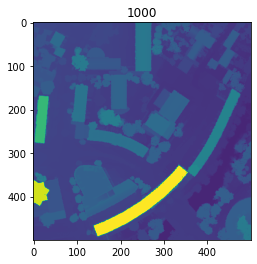

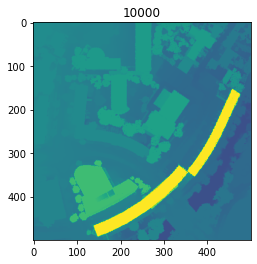

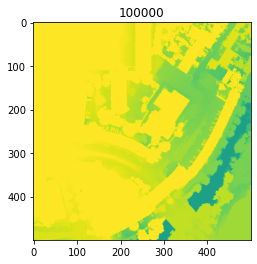

3

In [3]:
# Your turn!
area_thres = [1000, 10000, 100000]

area = max_tree.get_attribute('area')

profiles = []
for i in area_thres:
    new = max_tree.reconstruct(area < i)
    profiles.append(new)
    plt.imshow(new)
    plt.title(i)
    plt.show()
len(profiles)

In [4]:
profiles.insert(0, dsm)

In [5]:
profiles = np.array(profiles)
profiles.shape

(4, 500, 500)

# 2. Compute the Differential APs

The differential APs allows to see the structures removed at each thresholds.

- Compute the image differences from you attribute profiles stack
- Display!

In [6]:
A = np.arange(25).reshape(5,5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [7]:
A[1:2, 2:]

array([[7, 8, 9]])

In [8]:
A[:-1], A[1:], A[:-1] - A[1:]

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]),
 array([[ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]),
 array([[-5, -5, -5, -5, -5],
        [-5, -5, -5, -5, -5],
        [-5, -5, -5, -5, -5],
        [-5, -5, -5, -5, -5]]))

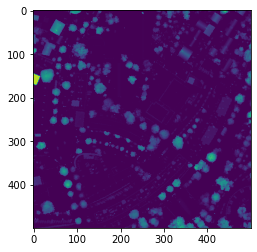

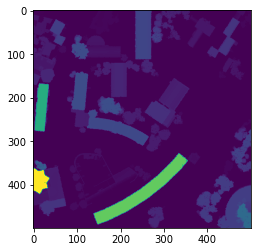

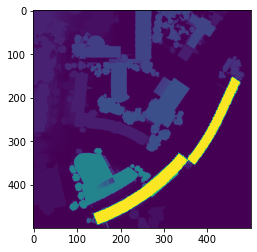

In [9]:
diffential = profiles[:-1] - profiles[1:] 

for diff_single in diffential:
    plt.imshow(diff_single)
    plt.show()

## 3. Compute and display complete APs (min and max), Differential APs and Self-dual Attribute Profiles

In [10]:
aps = sap.attribute_profiles(dsm, {'area': area_thres})

Total:   0%|          | 0/7 [00:00<?, ?it/s]

area:   0%|          | 0/7 [00:00<?, ?it/s]

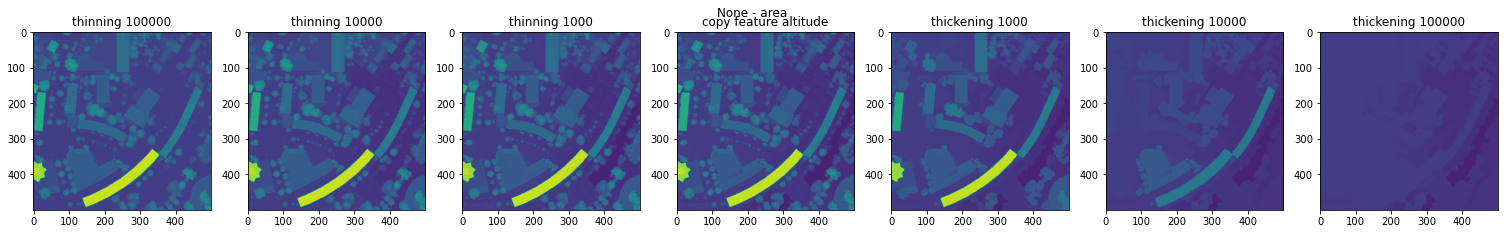

In [11]:
sap.show_profiles(aps, height=3)

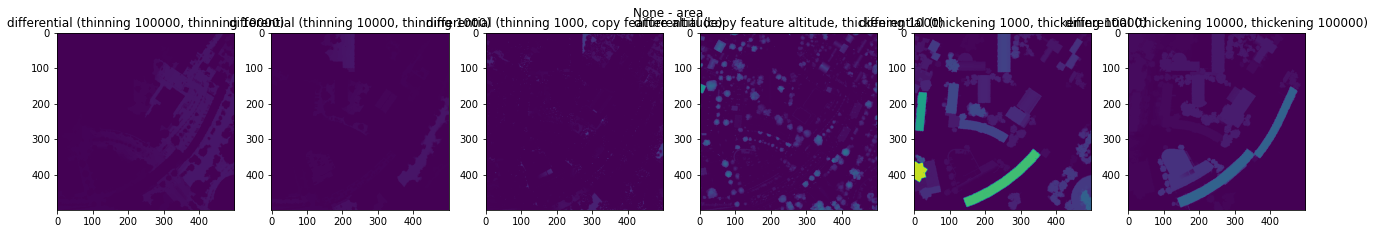

In [12]:
sap.show_profiles(aps.diff(), height=3)